> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [tmdb-movies dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This data set contains information
about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|)characters.
● There are some odd characters in the ‘cast’ column. Don’t worryabout cleaning them. You can leave them as is.
● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time

### Question(s) for Analysis
1- what Are the Top 10 Highest vote average Movie Titles And and their genres?
2-  Does budget Affects The vote average?
3- does runtime affects the vote average?

In [1]:
#FIRST : We import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as snb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness,assess your data to identify any problems in your data’s quality or structure.

### General Properties


In [2]:
# Loading our data:
df = pd.read_csv("tmdb-movies.csv")
#printing out first few rows:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#getting the shape our data:
df.shape

(10866, 21)

In [4]:
# getting more information about our data and columns dtypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# checking if we have any duplicated value so we drop them in cleaning stage:
df.duplicated().sum()

1

In [6]:
# checking if we have any important mising data the couild affect our analysis so we drop them in cleaning stage:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

# as we can see we have some columns like: imbd_id,cast,production_companies, and much more, have mising values but sence we willnot need all of these columns we can drop them, exept for "geners" column we will only drop the mising rows.


### Data Cleaning
HERE WE WILL CLEAN OUR DATA BY DROPPING COLUMNS THAT WE WILLNOT NEED FOR OUR ANALSIS,OR COLUMNS WITH MISING DATA THAT WILLNOT BE USED IN THIS ANLYSIS, ALSO DROPPING THE "geners" MISSING VALUES ROWS, AND FINALLY DROPPING DUPLICATED DATA  

In [7]:
# first dropping columns with missing values and columns we willnot need:
df.drop(["imdb_id","cast","homepage","director","tagline","keywords","overview","production_companies"],axis=1,inplace=True)
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [8]:
# droppind mising values in "geners" column:
df.dropna(subset=["genres"],inplace=True)
# checking again if we have any more mising values:  
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [9]:
# dropping duplicated data:
df.drop_duplicates(inplace=True)
# checking if we still have any duplicated data:
df.duplicated().sum()

0

In [10]:
# now we can get a Statistical summary for our cleaned dataset
df.describe().round().round()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.0,10842.0,10842.0,1.084200e+04,10842.0,10842.0,10842.0,10842.0,10842.0,1.084200e+04
mean,65871.0,1.0,14655309.0,3.991138e+07,102.0,218.0,6.0,2001.0,17587121.0,5.147798e+07
std,91981.0,1.0,30939714.0,1.171179e+08,31.0,576.0,1.0,13.0,34334367.0,1.447723e+08
min,5.0,0.0,0.0,0.000000e+00,0.0,10.0,2.0,1960.0,0.0,0.000000e+00
25%,10589.0,0.0,0.0,0.000000e+00,90.0,17.0,5.0,1995.0,0.0,0.000000e+00
50%,20557.0,0.0,0.0,0.000000e+00,99.0,38.0,6.0,2006.0,0.0,0.000000e+00
75%,75186.0,1.0,15000000.0,2.414118e+07,111.0,146.0,7.0,2011.0,20925067.0,3.387838e+07
max,417859.0,33.0,425000000.0,2.781506e+09,900.0,9767.0,9.0,2015.0,425000000.0,2.827124e+09


In [11]:
# checking the shape after dropping the columns:
df.shape

(10842, 13)

<a id='eda'></a>
## Exploratory Data Analysis
HERE WE WILL TRY TO ANSWER OUR THREE QUESITIONS BY ANALYSISNG THE DATA AND USE PLOTS TO VISUALIS OUR OUTPUTS



In [12]:
# printing first 3 rows of our data:
df.head(3)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### Research Question 1(what Are the Top 10 Highest vote average Movie Titles And and their genres?)

In [13]:
# first: lets create a function to use when we need to create histogram to any column we want: 
def histpl(df,column):
    df[column].plot(kind="hist",bins=20,grid=False,edgecolor="black",figsize=[14,3])
    #ADDING A TITLE:
    plt.title(f"histogram of {column} column")


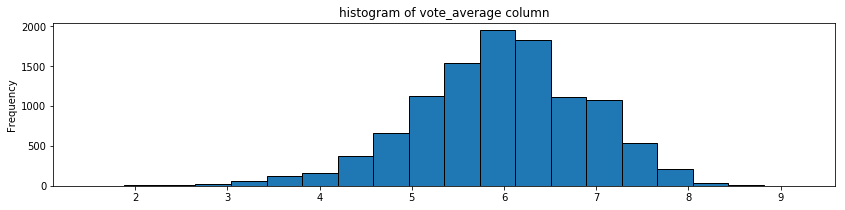

In [14]:
#lets use the function we created to create histogram to"vote average" column:
histpl(df,"vote_average")

AS WE CAN SEE ABOVE WE HAVE LEFT SKEWED DISTRUBIOTION FOR THE"VOTE AVERAGE"COLUMN 

In [15]:
#getting the top 10 vote average with their titels and release year: 
top_10 = df.nlargest(10,"vote_average")[["original_title","vote_average","release_year","genres"]]
top_10 = top_10.reset_index(level=0)
top_10

,index,original_title,vote_average,release_year,genres
0,3894,The Story of Film: An Odyssey,9.2,2011,Documentary
1,538,The Mask You Live In,8.9,2015,Documentary
2,1200,Black Mirror: White Christmas,8.8,2014,Drama|Horror|Mystery|Science Fiction|Thriller
3,2269,Life Cycles,8.8,2010,Documentary
4,6911,Pink Floyd: Pulse,8.7,2006,Music
5,2401,Opeth: In Live Concert At The Royal Albert Hall,8.6,2010,Music
6,3224,John Mayer: Where the Light Is Live in Los Ang...,8.5,2008,Music
7,3690,The Art of Flight,8.5,2011,Adventure|Documentary
8,8221,A Personal Journey with Martin Scorsese Throug...,8.5,1995,Documentary
9,8411,Queen - Rock Montreal,8.5,1981,Music


In [16]:
#getting The number of appearances for each genre from "genres" column:
top_10["genres"].value_counts()

Documentary                                      4
Music                                            4
Adventure|Documentary                            1
Drama|Horror|Mystery|Science Fiction|Thriller    1
Name: genres, dtype: int64

As we can see, among the top ten movies with the most average votes, the music and Documentary geners are the most common .

In [18]:
# create a dataframe that contains our previous output"top_10":
dftop_10 = pd.DataFrame(top_10)
dftop_10

,index,original_title,vote_average,release_year,genres
0,3894,The Story of Film: An Odyssey,9.2,2011,Documentary
1,538,The Mask You Live In,8.9,2015,Documentary
2,1200,Black Mirror: White Christmas,8.8,2014,Drama|Horror|Mystery|Science Fiction|Thriller
3,2269,Life Cycles,8.8,2010,Documentary
4,6911,Pink Floyd: Pulse,8.7,2006,Music
5,2401,Opeth: In Live Concert At The Royal Albert Hall,8.6,2010,Music
6,3224,John Mayer: Where the Light Is Live in Los Ang...,8.5,2008,Music
7,3690,The Art of Flight,8.5,2011,Adventure|Documentary
8,8221,A Personal Journey with Martin Scorsese Throug...,8.5,1995,Documentary
9,8411,Queen - Rock Montreal,8.5,1981,Music


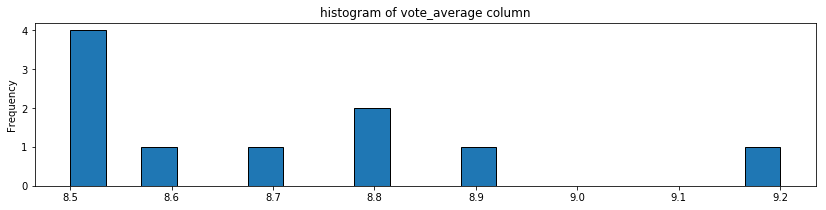

In [19]:
#lets use the function we created to create histogram to"vote average" column in the"dftop_10" dataframe:
histpl(dftop_10,"vote_average")

AS WE CAN SEE ABOVE MOST MOVIES GOT 8.5 AS VOTE AVERAGE

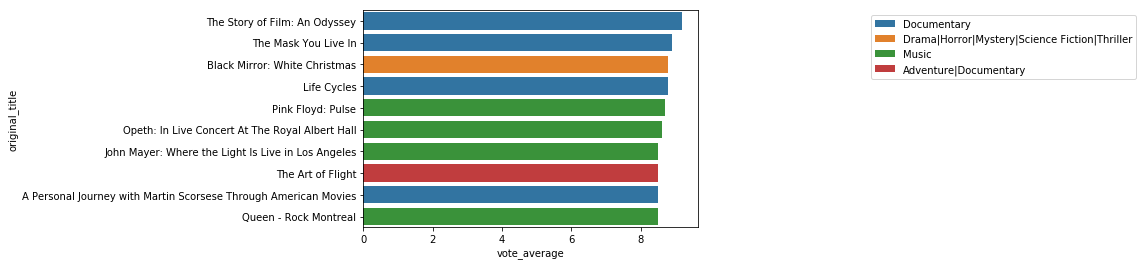

In [20]:
#ploting our output with bar plot:
snb.barplot(x="vote_average",y="original_title",data=top_10,hue="genres",dodge=False)
plt.legend(bbox_to_anchor=(1.5,1),loc=2);

### Research Question 2  (does budget affects the vote average?)

In [21]:
# does budget affects the vote average, as spending more money could help to make better movies,which increase vote average:
#first we display our df columns:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

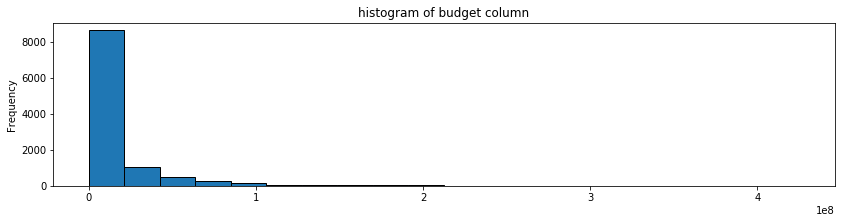

In [22]:
# first we take a quick look at the distrubiotion of "budget"column:
histpl(df,"budget")

AS WE CAN SEE ABOVE WE HAVE RIGHT SKEWED DISTRUBIOTION FOR THE "BUDGET" COLUMN

In [23]:
# lets create a function to create a scatter plot when we need:
def scatpl(df,xAXIS,yAXIS):
    plt.figure(figsize=(14,10))
    plt.scatter(df[xAXIS],df[yAXIS])
    #ADDING X LABEL:
    plt.xlabel("(xAXIS)")
    #ADDING Y LABEL:
    plt.ylabel("(yAXIS)")
    #ADDING A TITLE:
    plt.title(f"(relationship between {xAXIS} and {yAXIS} )")
    plt.show()

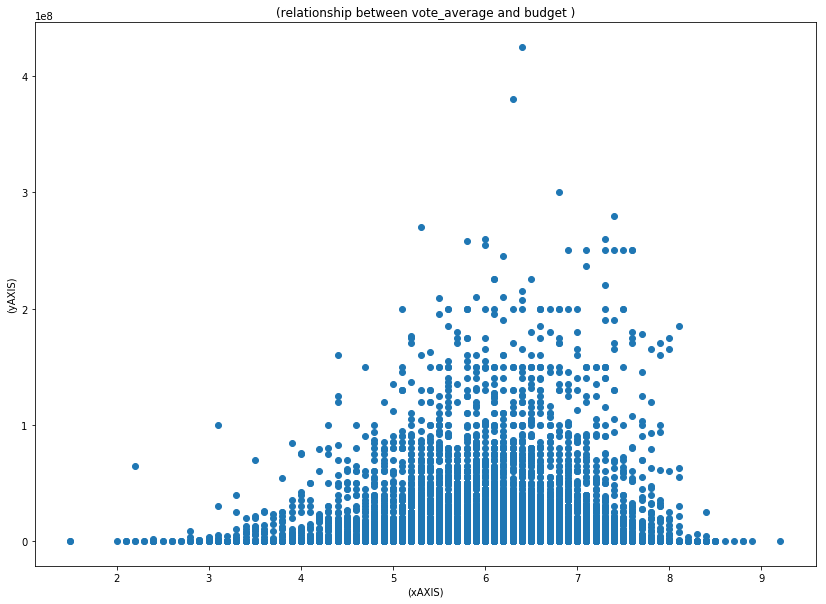

In [24]:
# lets use the function we created to make a scatter plot:
scatpl(df,"vote_average","budget")

AS WE CAN SEE ABOVE THERE IS A POSITIVE RELATIONSHIP BETWEEN THE BUDGET AND THE VOTE AVERAGE,AS SOME MOVIES SPENT MORE BUDGET AND GOT HIGHER AVERAGE VOTE

### Research Question 3  (does runtime affects the vote average?)

In [25]:
#does runtime affects the vote average, as more runtime could lead poeple to get bored , which decrease the vote average:
#first we display our df columns:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

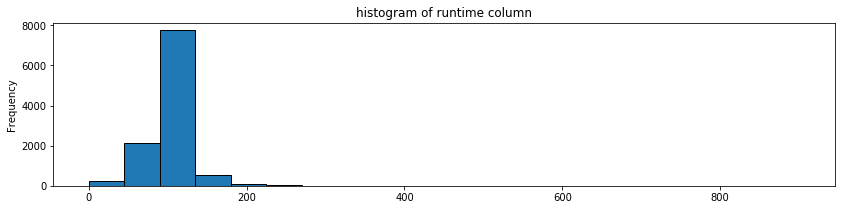

In [26]:
# first we take a quick look at the distrubiotion of "runtime"column:
histpl(df,"runtime")

AS WE CAN SEE ABOVE WE HAVE RIGHT SKEWED DISTRUBIOTION FOR THE "BUDGET" COLUMN

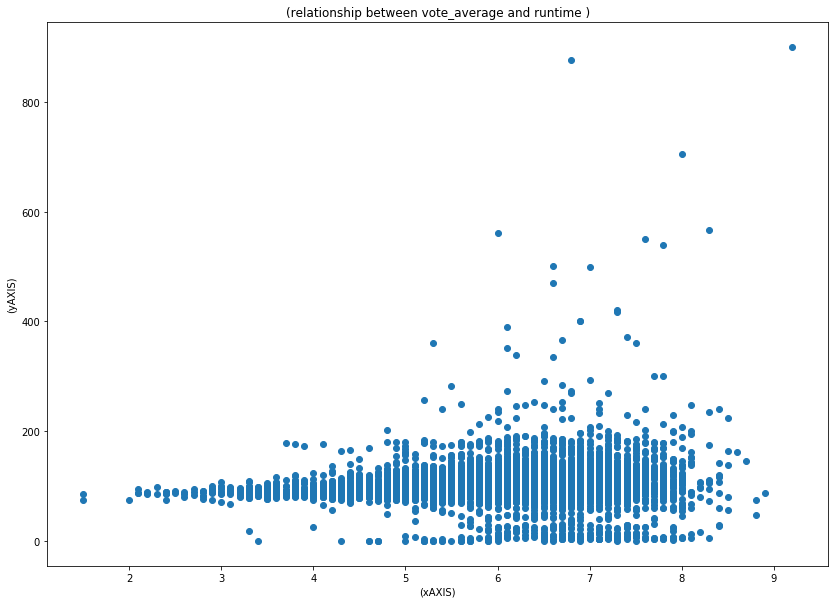

In [27]:
# lets use the function we created to make a scatter plot:
scatpl(df,"vote_average","runtime")

AS WE CAN SEE ABOVE THERE IS A POSITIVE RELATIONSHIP BETWEEN THE RUNTIME AND THE VOTE AVERAGE, AS SOME MOVIES HAVE MORE RUNTIME AND GOT HIGH VOTE AVERAGE 

<a id='conclusions'></a>
## Conclusions
OUR FIRST QUESTION WAS(what Are the Top 10 Highest vote average Movies Titles And and their genres?)
the answer is::
the Top 10 Highest vote average Movies are:
(1)-A Personal Journey with Martin Scorsese Through American Movies
(2)-Pink Floyd: Pulse                                                
(3)-Life Cycles                                                        
(4)-Black Mirror: White Christmas                                      
(5)- The Mask You Live In                                               
(6)-Queen - Rock Montreal                                              
(7)-John Mayer: Where the Light Is Live in Los Angeles                 
(8)-Opeth: In Live Concert At The Royal Albert Hall                    
(9)-The Art of Flight                                                  
(10)-The Story of Film: An Odyssey   
Among the top ten movies with the most average votes, the music and Documentary genres are the most common, And movies with the highes vote average were between the yearsfrom 1981 to 2015.
_______________________________________________________________________________________________________________________________
OUR SECOND QUESTION WAS(does budget affects the vote average?)
the answer is:
There is a positive relationship between budget and average rating, as most films that spent a larger budget got a better rating.
_______________________________________________________________________________________________________________________________
OUR THIRD QUESTION WAS(does runtime affects the vote average?) 
the answer is:
There is a positive relationship between running time and average voting, with most films with a longer runtime getting a better average voting, which is a surprise for me.
____________________________________________________________________________________________________________________________
WHERE ADDITIONAL RESEARCH CAN BE DONE?
In case that this analysis is presented to production companies that want to make new movies, I will suggest further analysis on which directors have a high vote rate to be hired as this will help the success of the movies.
_______________________________________________________________________________________________________________________________
LIMITATION:
It would be very helpful if there was a column listing the awards won for each film, as this would make the analysis more powerful

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0